# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [3]:
df = pd.read_csv('Categorical.csv')
df.sample(5)

,name,Longitude,Latitude,continent
135,Monaco,7.406277,43.752746,Europe
221,Taiwan,120.954273,23.753993,Asia
212,Togo,0.962328,8.525314,Africa
103,Iraq,43.743531,33.039706,Asia
85,Grenada,-61.682202,12.117250,North America


Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [54]:
data = df.copy()
data['continent'] = data['continent'].map({
    'Africa': 0,
    'Asia': 1,
    'Europe': 2,
    'North America': 3,
    'Oceania': 4,
    'South America': 5,
    'Seven seas (open ocean)': 6,
    'Antarctica': 7
}).astype('int')

## Select the features

In [62]:
X = data.iloc[:, -1]

## Clustering

Use 4 clusters initially.

In [83]:
kmeans = KMeans(4)

In [84]:
kmeans.fit(X.values.reshape(-1, 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [85]:
results = kmeans.fit_predict(X.values.reshape(-1, 1))

In [89]:
data['Clusters'] = results
data.sample(5)

,name,Longitude,Latitude,continent,Clusters
154,Namibia,17.209636,-22.130326,0,2
13,Fr. S. Antarctic Lands,69.226668,-49.248955,6,0
86,Greenland,-41.341911,74.710513,3,3
194,Sierra Leone,-11.792712,8.563296,0,2
152,Malawi,34.289356,-13.218081,0,2


## Plot the data

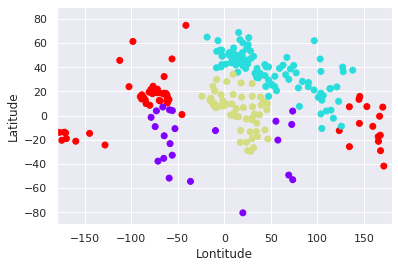

In [87]:
plt.scatter(x=data['Longitude'], y=data['Latitude'], c=data['Clusters'], cmap='rainbow')
plt.xlabel('Lontitude')
plt.ylabel('Latitude')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.